# 심혈관 질환 분류 모델 실습

In [1]:
# 필요 라이브러리 불러오기
import numpy as np          # 수치 데이터 연산
import pandas as pd         # 데이터프레임 조작

In [3]:
# 데이터 로드
df = pd.read_csv('datasets/CVD_cleaned.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

## 각 데이터 컬럼 설명

| 컬럼명                         | 설명                        | 비고                                                                 |
|------------------------------|-----------------------------|----------------------------------------------------------------------|
| General_Health               | 일반적인 건강 상태           | Poor : 매우 나쁨<br>Fair : 나쁨<br>Good : 보통<br>Very Good : 좋음<br>Excellent : 매우 좋음 |
| Checkup                      | 건강 검진 여부               | Within the past year : 1년 이내<br>Within the past 2 years : 2년 이내<br>Within the past 5 years : 5년 이내<br>5 or more years ago : 5년 이상 또는 그이상<br>Never : 한적 없음 |
| Exercise                     | 지난 한달동안 정기적인 운동 여부 | No : 아니요<br>Yes : 예                                            |
| Heart_Disease                | 심혈관 질환 여부              | No : 아니요<br>Yes : 예                                             |
| Skin_Cancer                  | 피부암 여부                  | No : 아니요<br>Yes : 예                                             |
| Other_Cancer                 | 기타 암 발생 여부            | No : 아니요<br>Yes : 예                                             |
| Depression                   | 우울증 여부                  | No : 아니요<br>Yes : 예                                             |
| Diabetes                     | 당뇨병 여부                  | No : 아니요<br>Yes : 예<br>No, pre-diabetes or borderline diabetes : 당뇨 전단계 또는 경계성 당뇨병 상태 <br>Yes, but female told only during pregnancy : 임신 중에만 당뇨병 진단을 받은 여성 |
| Arthritis                    | 관절염 여부                  | No : 아니요<br>Yes : 예                                             |
| sex                          | 응답자 성별                  | Male : 남자<br>Female : 여자                                       |
| Age_Category                 | 연령대별 구분(5 기준)        | 18 ~ 80세 이상까지 총 13개의 카테고리                                                                     |
| Height_(cm)                  | 응답자 신장                  |                                                                      |
| Weight_(kg)                  | 응답자 체중                  |                                                                      |
| BMI                          | 응답자 체질량 지수           |                                                                      |
| Smoking_History              | 흡연 여부                    | No : 아니요<br>Yes : 예                                             |
| Alcohol_Consumption          | 알코올 소비                  |                                                                      |
| Fruit_Consumption            | 과일 소비                    |                                                                      |
| Green_Vegetables_Consumption | 녹색 야채 소비               |                                                                      |
| FriedPotato_Consumption      | 감자 튀김 소비               |                                                                      |


## 데이터 정보 확인

In [7]:
# 데이터 프레임 상위 5개의 행 확인
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [9]:
# 통계량 확인
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [11]:
# 컬럼 별 결측치 확인하기
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

## 데이터 전처리

### 범주형 데이터 원핫인코딩 진행

In [15]:
# 대상 컬럼 리스트
one_hot_columns = [
    'General_Health', 'Checkup', 'Diabetes', 'Exercise', 
    'Skin_Cancer', 'Other_Cancer', 'Age_Category', 
    'Depression', 'Arthritis', 'Sex', 'Smoking_History'
]

# 원-핫 인코딩 진행
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# 결과 확인
df.head()


,Heart_Disease,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,...,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Depression_Yes,Arthritis_Yes,Sex_Male,Smoking_History_Yes
0,No,150.0,32.66,14.54,0.0,30.0,16.0,12.0,False,False,...,False,False,False,True,False,False,False,True,False,True
1,Yes,165.0,77.11,28.29,0.0,30.0,0.0,4.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,No,163.0,88.45,33.47,4.0,12.0,3.0,16.0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,Yes,180.0,93.44,28.73,0.0,30.0,30.0,8.0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,No,191.0,88.45,24.37,0.0,8.0,4.0,0.0,False,True,...,False,False,False,False,False,True,False,False,True,True


### y에 해당하는 Heart_Disease 컬럼 레이블인코딩 진행

In [18]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# Heart_Disease 컬럼 레이블 인코딩
df['Heart_Disease'] = label_encoder.fit_transform(df['Heart_Disease'])

# 결과 확인
df[['Heart_Disease']].head()

,Heart_Disease
0,0
1,1
2,0
3,1
4,0


### 학습 및 테스트 데이터 분리

In [21]:
df['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

# 입력 데이터(features)와 출력 데이터(target) 분리
X = df.drop(columns=['Heart_Disease'])  # 'Heart_Disease'를 타겟 변수로 사용
y = df['Heart_Disease']                 # 타겟 변수 정의

# 데이터를 학습 데이터셋과 테스트 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,                                               
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# 결과 확인
print("학습 데이터셋 크기:", X_train.shape, y_train.shape)
print("테스트 데이터셋 크기:", X_test.shape, y_test.shape)

학습 데이터셋 크기: (247083, 37) (247083,)
테스트 데이터셋 크기: (61771, 37) (61771,)


### y(종속변수)를 제외한 데이터(X_train, X_test) 표준화

In [26]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 대상 컬럼 정의
scaling_columns = [
    'Height_(cm)', 'Weight_(kg)', 'BMI', 
    'Alcohol_Consumption', 'Fruit_Consumption', 
    'Green_Vegetables_Consumption', 'FriedPotato_Consumption'
]

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 학습 데이터에서 스케일링 대상 컬럼만 변환
X_train_scaled = X_train.copy()
X_train_scaled[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])

# 테스트 데이터에서 동일한 스케일링 적용
X_test_scaled = X_test.copy()
X_test_scaled[scaling_columns] = scaler.transform(X_test[scaling_columns])

# 결과 확인
print("스케일링된 학습 데이터 (일부):\n", X_train_scaled[scaling_columns].head().to_string(index=False))
print("\n스케일링된 테스트 데이터 (일부):\n", X_test_scaled[scaling_columns].head().to_string(index=False))

스케일링된 학습 데이터 (일부):
  Height_(cm)  Weight_(kg)      BMI  Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption
    0.626667     0.287649 0.202639             0.000000           0.750000                      0.062500                  0.03125
    0.426667     0.160742 0.187263             0.000000           0.133333                      0.000000                  0.00000
    0.526667     0.270713 0.248422             0.133333           0.066667                      0.093750                  0.12500
    0.480000     0.228410 0.236259             0.033333           0.033333                      0.031250                  0.09375
    0.646667     0.439922 0.326104             0.000000           0.000000                      0.117188                  0.15625

스케일링된 테스트 데이터 (일부):
  Height_(cm)  Weight_(kg)      BMI  Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption
    0.526667     0.143806 0.113712             1

## 딥러닝 모델 생성

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 시드 고정
np.random.seed(42)
tf.random.set_seed(42)

# 모델 생성
model = Sequential()

# 모델 구성
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.2))  # 드롭아웃 비율 20%
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(rate=0.2))  # 드롭아웃 비율 20%
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(rate=0.2))  # 드롭아웃 비율 20%
model.add(Dense(units=1, activation='sigmoid'))  # 이진 분류 문제에 적합한 sigmoid 활성화 함수

# 모델 요약
model.summary()

c:\Users\User\Desktop\text-generation-webui-main\installer_files\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,217 (20.38 KB)

 Trainable params: 5,217 (20.38 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일

In [34]:
# 모델 컴파일
model.compile(
    optimizer='adam',                    # Adam 옵티마이저 사용
    loss='binary_crossentropy',          # 이진 분류를 위한 손실 함수
    metrics=['accuracy']                 # 평가 지표
)


### 모델 학습

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# early stopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',    # 검증 손실(val_loss)을 기준으로 모니터링
    patience=5,            # 개선되지 않는 에폭 수 (5회 연속 개선되지 않으면 학습 중단)
    restore_best_weights=True  # 가장 성능이 좋은 모델의 가중치를 복원
)

# 모델 학습
history = model.fit(
    X_train_scaled,        # 학습 데이터 (입력)
    y_train,               # 학습 데이터 (타겟)
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    epochs=50,            # 최대 학습 반복 횟수
    batch_size=32,         # 배치 크기
    callbacks=[early_stopping],  # 얼리 스탑핑 콜백 추가
    verbose=1              # 학습 과정 출력 (1: 상세 출력)
)


Epoch 1/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 6s 869us/step - accuracy: 0.9180 - loss: 0.2729 - val_accuracy: 0.9185 - val_loss: 0.2251
Epoch 2/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 864us/step - accuracy: 0.9195 - loss: 0.2359 - val_accuracy: 0.9185 - val_loss: 0.2241
Epoch 3/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 869us/step - accuracy: 0.9195 - loss: 0.2334 - val_accuracy: 0.9185 - val_loss: 0.2235
Epoch 4/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 861us/step - accuracy: 0.9195 - loss: 0.2329 - val_accuracy: 0.9185 - val_loss: 0.2235
Epoch 5/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 882us/step - accuracy: 0.9195 - loss: 0.2326 - val_accuracy: 0.9185 - val_loss: 0.2234
Epoch 6/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 865us/step - accuracy: 0.9195 - loss: 0.2319 - val_accuracy: 0.9185 - val_loss: 0.2233
Epoch 7/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 878us/step - accuracy: 0.9195 - loss: 0.2306 - val_accuracy: 0.9185 - val_loss: 0.2237
Epoch 8/50
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - accuracy: 0.9195 -

In [48]:
!pip install matplotlib

## 시각화

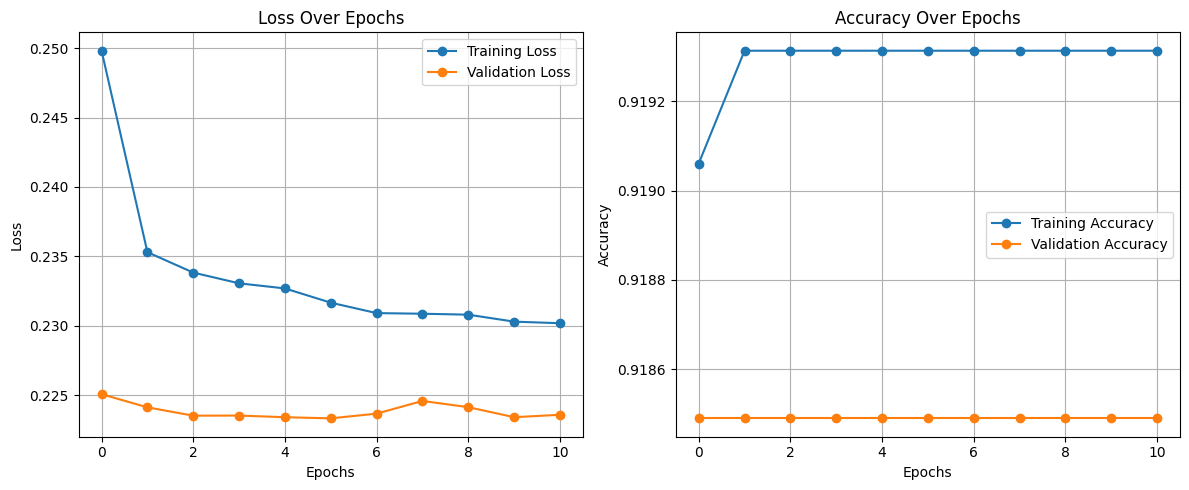

In [51]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
def plot_training_history(history):
    # 손실 그래프
    plt.figure(figsize=(12, 5))
    
    # 손실 값 (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # 정확도 값 (Accuracy)
    plt.subplot(1, 2, 2)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
    
    # 그래프 출력
    plt.tight_layout()
    plt.show()

# 함수 호출: 모델 학습 결과 시각화
plot_training_history(history)


In [53]:
# 예측
predictions = model.predict(X_test_scaled)
print(predictions)

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step
[[0.01927296]
 [0.00550365]
 [0.00296123]
 ...
 [0.2661572 ]
 [0.01752891]
 [0.00205602]]


In [55]:
# 확률 기반 예측 결과를 0 또는 1로 변환
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [57]:
for pred, true in zip(binary_predictions, y_test):
    print(f"예측: {pred}, 실제: {true}, 일치 여부: {'O' if pred == true else 'X'}")

예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 1, 일치 여부: X
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 1, 일치 여부: X
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 1, 일치 여부: X
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O
예측: [0], 실제: 0, 일치 여부: O



▶ 정확도(Accuracy): 0.92

▶ 혼동행렬:
[[56777     0]
 [ 4994     0]]


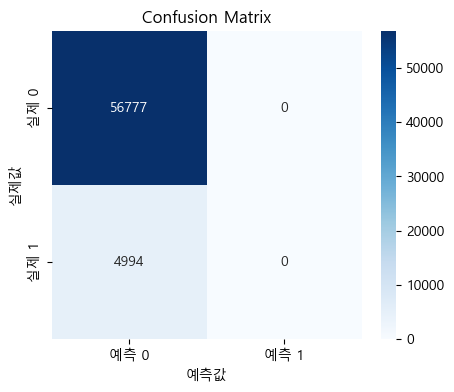


▶ 분류 성능 보고서:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.00      0.00      0.00      4994

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 정확도
acc = accuracy_score(y_test, binary_predictions)
print(f"\n▶ 정확도(Accuracy): {acc:.2f}")

# 혼동행렬
cm = confusion_matrix(y_test, binary_predictions)
print("\n▶ 혼동행렬:")
print(cm)

# 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['예측 0', '예측 1'], yticklabels=['실제 0', '실제 1'])
plt.title("Confusion Matrix")
plt.ylabel("실제값")
plt.xlabel("예측값")
plt.show()

# 분류 리포트
print("\n▶ 분류 성능 보고서:")
print(classification_report(y_test, binary_predictions))

In [67]:
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings

# 경고창 제거
warnings.filterwarnings('ignore')

# 한글 글꼴 설정
rc('font', family='Malgun Gothic')